<a href="https://colab.research.google.com/github/KyungRyeolBaek/study/blob/main/AI%20study/ODE/ErrorCorr_f(xy)_21_07_25_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Error Corr

f(x, y)

anal(x)

Error_Corr
    sigmoid(x)

    sigmoid_grad(x)

    neural_network(W, x)

    d_neural_network_dx(W, x, k=1)

f(x, y)

python version 3.10.4

tensorflow version 2.9.1

In [6]:
import tensorflow as tf
import numpy as np

In [28]:
# 출력할 x 범위
x = tf.Variable(np.array([[i/100] for i in range(0, 100, 1)], dtype = np.float32))

# 차수, weight 개수
n = 4

# w = [weight1, weight2, weight3, weight4]
w = tf.random.normal([n], name = 'weights')
# for i in range(1, n+1):
#     w.append(tf.random.normal([1], name = 'weight{}'.format(i)))

# analysis 함수 
def anal(x, lamb = 1):
    return np.exp(lamb*x)

def f(x, y, lamb = 1):
    return lamb*x*y

# n : w 개수, w : weight
def y(x, w, n = 4):
    y = 1
    
    # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4)
    for i in range(1, n+1):
        y += w[i-1]*(x**i)
    
    return y

def yprime(x, w, n = 4):
    yprime = 0

    # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3) + 5*w5*(x**4) + 6*w6*(x**5)
    for i in range(1, n + 1):
      yprime += i*w[i-1]*(x**(i-1))

    return yprime
# print(tf.reduce_mean(tf.square(yprime(x, w, n = 4) - y(x, w, n = 4))))
# print(y(x, w, n=4))
# print(yprime(x, w, n=4))
cost = lambda : tf.reduce_mean(tf.square(yprime(x, w, n = 4) - y(x, w, n = 4)))
optimizer = tf.optimizers.SGD(learning_rate = 1e-2)
train = optimizer.minimize(cost, var_list=w)

NotImplementedError: Updating a `Tensor` is not implemented. Received: var=[-0.76617265 -1.0167525   0.42480996  0.4262353 ].

In [1]:
# !pip install google
# !pip install protobuf

import

In [2]:
import autograd.numpy as np
from autograd import grad 
import autograd.numpy.random as npr
from autograd.core import primitive
from matplotlib import pyplot as plt
%matplotlib inline

using GPU

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.python.client import device_lib 
device_lib.list_local_devices() 
tf.test.is_gpu_available()
# gpu를 사용하려면 cmd와 jupyter notebook cell에서 모두 True값이 나와야 함

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\Users\forev\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-7fd9ae13077d>", line 1, in <module>
    import tensorflow.compat.v1 as tf
  File "c:\Users\forev\anaconda3\lib\site-packages\tensorflow\__init__.py", line 98, in <module>
    from tensorflow_core import *
  File "c:\Users\forev\anaconda3\lib\site-packages\tensorflow_core\__init__.py", line 40, in <module>
    from tensorflow.python.tools import module_util as _module_util
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 959, in _find_and_load_unlocked
  File "c:\Users\forev\anaconda3\lib\site-packages\tensorflow\__init__.py", line 50, in __getattr__
    module = self._load()
  File "c:\Users\forev\anaconda3\lib\site-packages\tensorflow\__init__.py", line 44, in _load
    module = _importlib.import_module

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

Parameter

In [3]:
x_max = 1             # 최대 x 범위 : 0 <= x < x_max
w_number = 6          # w 개수
cost_limit = 0.1      # 최소 cost 
step_number = 30000   # step 횟수

In [4]:
def f(x, y):          # f(x, y)
  return 2*x*y

def anal(x):
  return np.exp(x)

def Error_Corr(x_max = 1, w_number = 6, cost_limt = 0.1, step_number = 30000):
  def sigmoid(x):
      return 1 / (1 + tf.math.exp(-x))

  def sigmoid_grad(x):
      return sigmoid(x) * (1 - sigmoid(x))

  def neural_network(W, x):
      a1 = sigmoid(tf.tensordot(x, W[0], axes = 1))
      return tf.tensordot(a1, W[1], axes = 1)

  def d_neural_network_dx(W, x, k=1):
      return tf.tensordot(tf.transpose(W[1]), tf.transpose(W[0])**k, axes = 1) * sigmoid_grad(x)

  x = tf.Variable(np.array([[i/100] for i in range(0, x_max * 100, 1)], dtype = np.float32))
  W = [tf.Variable(tf.random_normal([1, 10])), tf.Variable(tf.random_normal([10, 1]))]
  for i in range(1, w_number + 1):
      globals()['w{}'.format(i)] = tf.Variable(tf.random_normal([1]), name = 'weight{}'.format(i))
  y = 1
  yprime = 0

  sess = tf.Session()
  init = tf.global_variables_initializer()
  sess.run(init)

  for i in range(1, w_number + 1):
      y += globals()['w{}'.format(i)]*(x**i)  # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4) + w5*(x**5) + w6*(x**6)
      yprime += i*globals()['w{}'.format(i)]*(x**(i-1))  # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3) + 5*w5*(x**4) + 6*w6*(x**5)

  ye = (x**(w_number + 1)) * neural_network(W, x)
  yeprime = (w_number + 1) * (x**(w_number))*neural_network(W, x) + (x**(w_number + 1)) * d_neural_network_dx(W, x)

  cost = tf.reduce_mean(tf.square(yeprime - ye)) + tf.reduce_mean(tf.square(yprime - f(x, y)))
  optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
  train = optimizer.minimize(cost)

  count = 0
  cost_val = 1
  while cost_val > cost_limt:
    global x_space
    global y_space
    global ye_space
    global corr_space
    global cost_space

    x_space = []
    y_space = []
    ye_space = []
    corr_space = []
    cost_space = []

    if count % 1 == 0:
      print("count: ", count)
    for step in range(step_number + 1):
      for i in range(1, w_number + 1):
          globals()['w{}_val'.format(i)] = sess.run([globals()['w{}'.format(i)]])
      cost_val, yeprime_val, ye_val, yprime_val, y_val, x_val, _ = sess.run([cost, yeprime, ye, yprime, f(x, y), x, train])
      if count % 1 == 0:
        if step % int(step_number / 2) == 0:
            print('step: ', step, ", Cost: ", cost_val, "\n")
    if count % 1 == 0:
      print("\n")

    count += 1

    x_space += list(x_val)
    corr_space += list(ye_val + y_val)
    y_space += list(y_val)
    ye_space += list(ye_val)

    # final_sol = ye + f(x, y)
    # anal_sol = anal(x)
    # error = abs(final_sol - anal_sol)
    # print(np.linalg.norm)
    plt.plot(x_space, corr_space, '.', label = 'ye + f(x,y)')
    plt.plot(x_space, y_space, '.', label = 'f(x,y)')
    plt.plot(x_space, ye_space, '.', label = 'ye')
    plt.plot(x_space, anal(x_space), '.', label = 'exp')
    plt.legend()
    plt.show()

  sess.close()

In [5]:
x_max = 1             # 최대 x 범위 : 0 <= x < x_max
w_number = 6          # w 개수
cost_limit = 0.01      # 최소 cost 
step_number = 50    # step 횟수 -> 총 step 횟수 = count * step

def f(x, y):          # f(x, y)
  return y

def anal(x):
  return np.exp(x)

Error_Corr(x_max, w_number, cost_limit, step_number)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\Users\forev\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-d6789fa73c36>", line 12, in <module>
    Error_Corr(x_max, w_number, cost_limit, step_number)
  File "<ipython-input-4-746e02d96a3e>", line 21, in Error_Corr
    x = tf.Variable(np.array([[i/100] for i in range(0, x_max * 100, 1)], dtype = np.float32))
NameError: name 'tf' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\forev\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\forev\anaconda3\lib\site-packages\IPy

NameError: name 'tf' is not defined

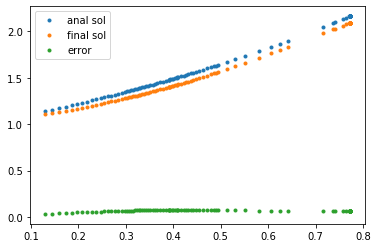

0.7003669


In [7]:
error = abs(corr_space - anal(x_space))
plt.plot(x_space, anal(x_space), '.', label = 'anal sol')
plt.plot(x_space, corr_space, '.', label = 'final sol')
plt.plot(x_space, error, '.', label = 'error')
plt.legend()
plt.show()
print(np.linalg.norm(error))